In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import binomtest,chisquare,ttest_1samp,chi2_contingency,ttest_ind,f_oneway,pearsonr
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,f1_score,recall_score,accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler,RobustScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV,cross_val_score,validation_curve,learning_curve,train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif,f_regression
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("train_data.csv")
df

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


In [3]:
df.info()
#on constate qu'on a 6 int et 3 object et on a 5 type float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   Surname          143579 non-null  object 
 3   CreditScore      143579 non-null  int64  
 4   Geography        143579 non-null  object 
 5   Gender           143579 non-null  object 
 6   Age              143579 non-null  float64
 7   Tenure           143579 non-null  int64  
 8   Balance          143579 non-null  float64
 9   NumOfProducts    143579 non-null  int64  
 10  HasCrCard        143579 non-null  float64
 11  IsActiveMember   143579 non-null  float64
 12  EstimatedSalary  143579 non-null  float64
 13  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.3+ MB


In [4]:
df.describe()

,ID,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,143579.000000,1.435790e+05,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000,143579.000000
mean,82521.171097,1.569202e+07,656.411704,38.144476,5.018408,55533.640642,1.553932,0.754107,0.496800,112530.072465,0.212078
std,47650.353367,7.142049e+04,80.210361,8.871711,2.807027,62822.616346,0.546754,0.430617,0.499991,50301.718378,0.408781
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41259.500000,1.563299e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,82485.000000,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117931.100000,0.000000
75%,123793.500000,1.575685e+07,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155149.685000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
df.isna().sum()
# et je constate quon a aucune valeur manquante donc le dataset a ete traiter

ID                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# IDENTIFICATION DES VARIABLES 

<h2>VARIABLE DISCRETE</h2>
    .Surname
    .Geography
    .Gender
    .Tenure
    .NumOfProducts
    .HasCrCard
    .IsActiveMember
    .Exited
<h2>VARIABLE CONTINUE</h2>
    .ID
    .CustomerId
    .CreditScore
    .Age
    .Balance
    .EstimatedSalary

# APRES AVOIR IDENTIFIER ON VA EFFECTUER UN ANALYSE UNIVARIEE DE NOS VARIABLES 

<h1>ANALYSE UNIVARIEE DISCRETE</h1>

In [6]:
df['Geography'].value_counts(ascending=True)
# on constate qu'on a plus de clients en france dans notre jeu de donnees

Geography
Germany    30105
Spain      31588
France     81886
Name: count, dtype: int64

<Axes: xlabel='Geography'>

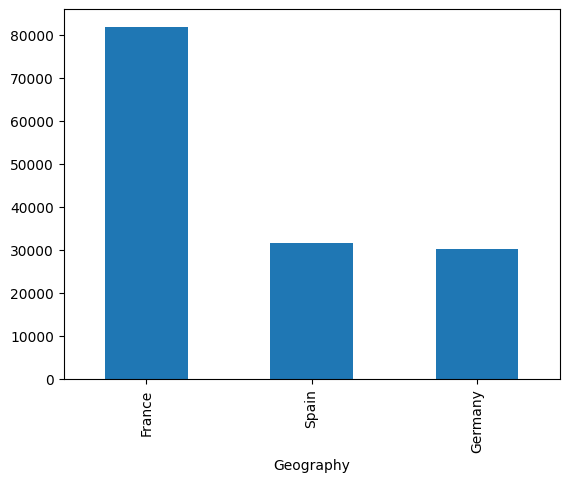

In [7]:
df['Geography'].value_counts().plot(kind="bar")


In [8]:
df["Gender"].value_counts()
# on a plus d'homme que de femme dans notre jeu de donnees

Gender
Male      80966
Female    62613
Name: count, dtype: int64

<Axes: xlabel='Gender'>

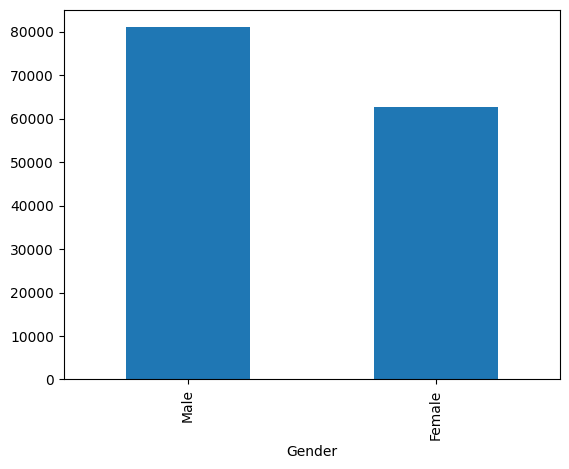

In [9]:
df["Gender"].value_counts().plot(kind="bar")


In [10]:
df['Tenure'].value_counts()
# dans notre jeu de donnees le plus grand nombre de personnes on une duree de 2 ans

Tenure
2     15766
7     15474
8     15272
4     15257
5     14984
1     14603
9     14557
3     14484
6     13716
10     5120
0      4346
Name: count, dtype: int64

<Axes: xlabel='Tenure'>

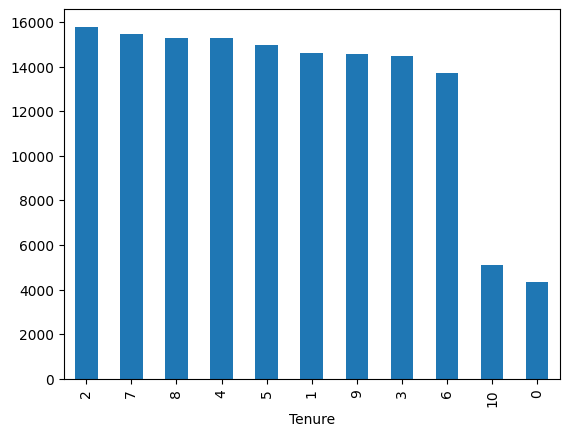

In [11]:
df['Tenure'].value_counts().plot(kind="bar")


In [12]:
df["NumOfProducts"].value_counts()
# dans notre jeu de donnees le plus grand nommbre de clients utilise 2 produits

NumOfProducts
2    73301
1    67364
3     2510
4      404
Name: count, dtype: int64

<Axes: xlabel='NumOfProducts'>

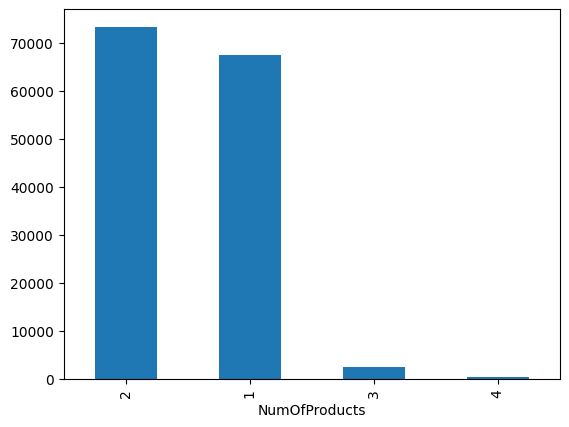

In [13]:
df["NumOfProducts"].value_counts().plot(kind="bar")

In [14]:
df["HasCrCard"].value_counts()
# dans notre jeu de donnees on a plus de clients qui possedent une carte de credit

HasCrCard
1.0    108274
0.0     35305
Name: count, dtype: int64

<Axes: xlabel='HasCrCard'>

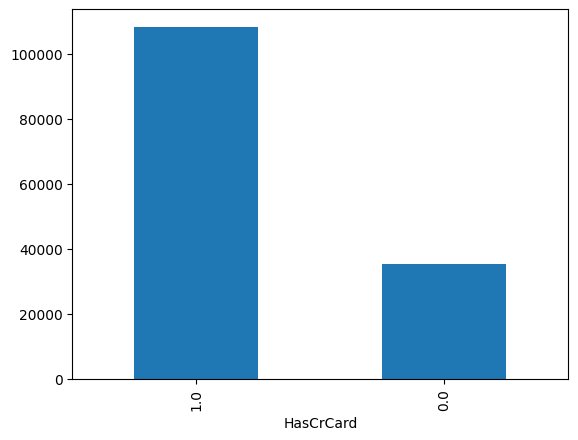

In [15]:
df["HasCrCard"].value_counts().plot(kind="bar")

In [16]:
df["IsActiveMember"].value_counts()
# dans notre jeu de donnees on a plus de de clients non actif que de clients actif

IsActiveMember
0.0    72249
1.0    71330
Name: count, dtype: int64

<Axes: xlabel='IsActiveMember'>

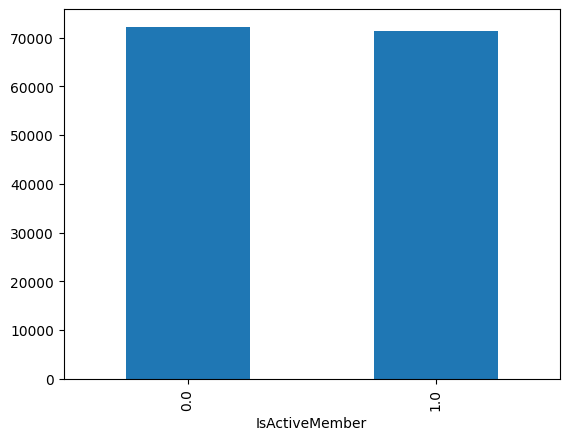

In [17]:
df["IsActiveMember"].value_counts().plot(kind="bar")

In [18]:
df["Exited"].value_counts()
# dans notre jeu de donnee on voit qu'on a plus de clients qui ne sont pas parti

Exited
0    113129
1     30450
Name: count, dtype: int64

<Axes: xlabel='Exited'>

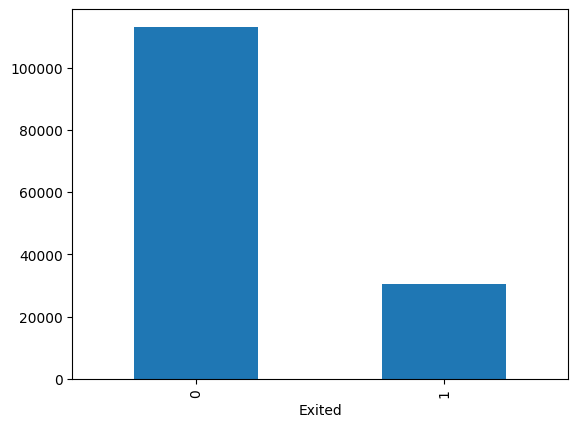

In [19]:
df["Exited"].value_counts().plot(kind="bar")

# ANALYSE UNIVARIEE DE NOS VARIABLE CONTINUE

In [20]:
df["CreditScore"].describe().round(2)
# dans ce jeu de donnee on a des un creditscore moyen de 656.41 un minimum de 350.00 et un max de 850.00 et on constate la presence des outlier

count    143579.00
mean        656.41
std          80.21
min         350.00
25%         597.00
50%         659.00
75%         710.00
max         850.00
Name: CreditScore, dtype: float64

<Axes: xlabel='CreditScore'>

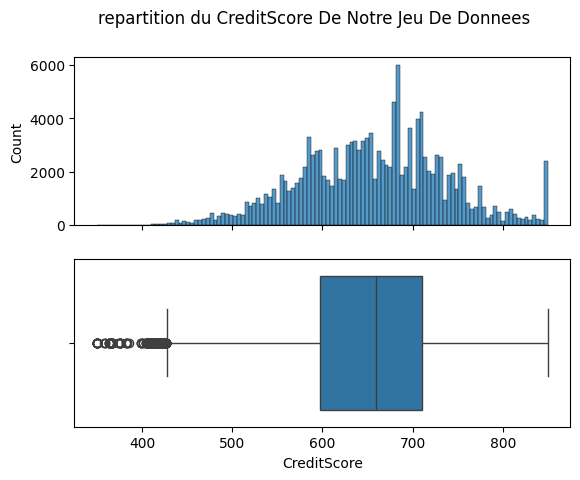

In [21]:
fig, ax = plt.subplots(2,1,sharex=True)
plt.suptitle("repartition du CreditScore De Notre Jeu De Donnees")
sns.histplot(data=df,x="CreditScore",ax=ax[0])
sns.boxplot(data=df,x="CreditScore",ax=ax[1])


In [22]:
df["Age"].describe()
#on constate que l'age moyen dans notre jeu de donnee est de 38 ans et lage minimum est de 18 ans et lage maximum est de 92 ans et on constate la presence des outliers

count    143579.000000
mean         38.144476
std           8.871711
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

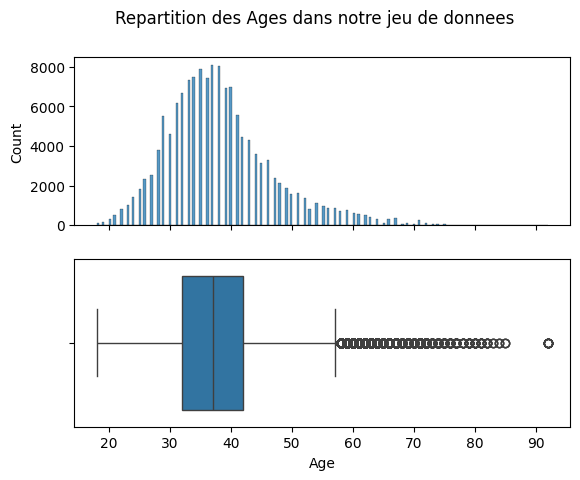

In [23]:
fig,ax=plt.subplots(2,1,sharex=True)
plt.suptitle("Repartition des Ages dans notre jeu de donnees")
sns.histplot(data=df,x="Age",ax=ax[0])
sns.boxplot(data=df,x="Age",ax=ax[1])

In [24]:
df["Balance"].describe()
# dans notre jeu de donnee on constate quon a un solde moyen de 55533.640642 et un minimum de 0 et un solde max de 250898.090000 et pas de outliers

count    143579.000000
mean      55533.640642
std       62822.616346
min           0.000000
25%           0.000000
50%           0.000000
75%      119948.090000
max      250898.090000
Name: Balance, dtype: float64

<Axes: xlabel='Balance'>

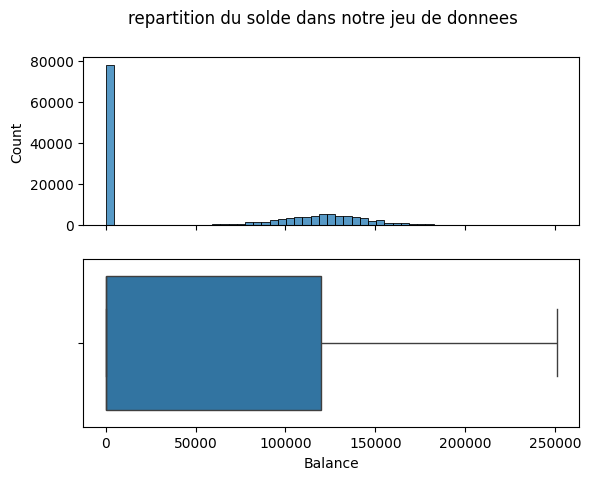

In [25]:
fig,ax=plt.subplots(2,1,sharex=True)
plt.suptitle("repartition du solde dans notre jeu de donnees")
sns.histplot(data=df,x="Balance",ax=ax[0])
sns.boxplot(data=df,x="Balance",ax=ax[1])

# ON VA MAINTENANT EFFECTUER UNE ANNALYSE MULTIVARIER 

<h1>ANALYSE DISCRET DISCRETE</h1>

In [26]:
pd.crosstab(df["Gender"],df["Exited"])

Exited,0,1
Gender,,
Female,45038,17575
Male,68091,12875


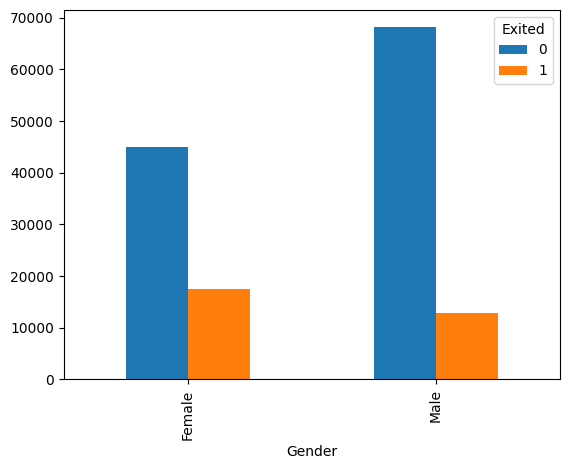

In [27]:
data=pd.crosstab(df["Gender"],df["Exited"]).plot(kind="bar")
# on constate dans notre jeu de donnee qu'on a plus de femme qui resili que les hommes

In [28]:
pd.crosstab(df["Geography"],df["Exited"])

Exited,0,1
Geography,,
France,68338,13548
Germany,18657,11448
Spain,26134,5454


<Axes: xlabel='Geography'>

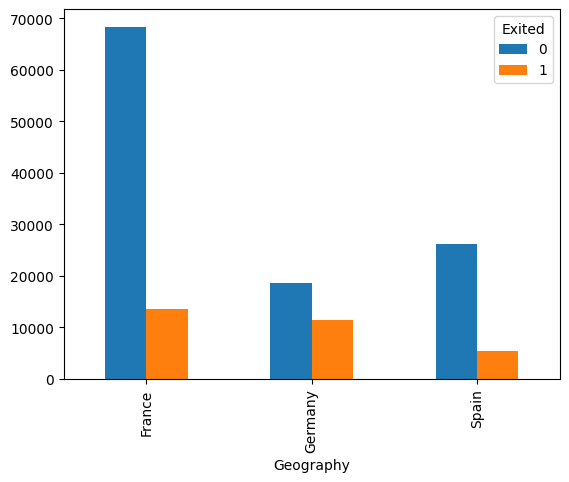

In [29]:
pd.crosstab(df["Geography"],df["Exited"]).plot(kind="bar")
# on constate quon a plus de de personnes qui partent en france que dans les autres pays

In [30]:
pd.crosstab(df["Tenure"],df["Exited"])

Exited,0,1
Tenure,,
0,3234,1112
1,11281,3322
2,12692,3074
3,11171,3313
4,11787,3470
5,11685,3299
6,11010,2706
7,12560,2914
8,12221,3051


<Axes: xlabel='Tenure'>

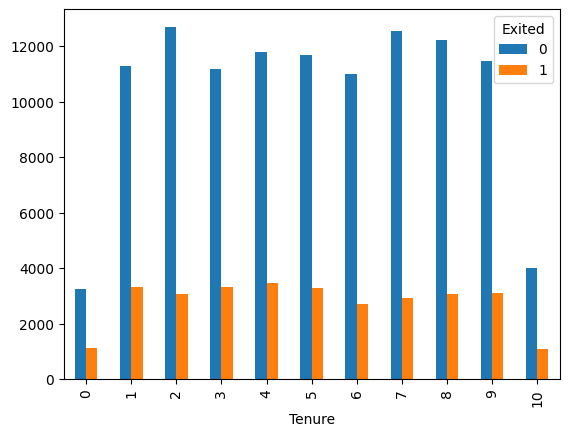

In [31]:
pd.crosstab(df["Tenure"],df["Exited"]).plot(kind="bar")
# les clients qui partent le plus dans notre jeu de donnees le font au bout de 4 ans 

In [32]:
pd.crosstab(df["NumOfProducts"],df["Exited"])

Exited,0,1
NumOfProducts,,
1,43905,23459
2,68879,4422
3,292,2218
4,53,351


<Axes: xlabel='NumOfProducts'>

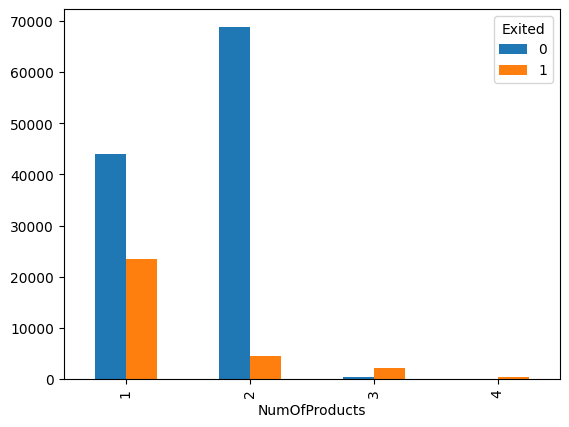

In [33]:
pd.crosstab(df["NumOfProducts"],df["Exited"]).plot(kind="bar")
# les clients qui partent le plus utilisent un seul produit

In [34]:
pd.crosstab(df['IsActiveMember'],df['Exited'])

Exited,0,1
IsActiveMember,,
0.0,50742,21507
1.0,62387,8943


<Axes: xlabel='IsActiveMember'>

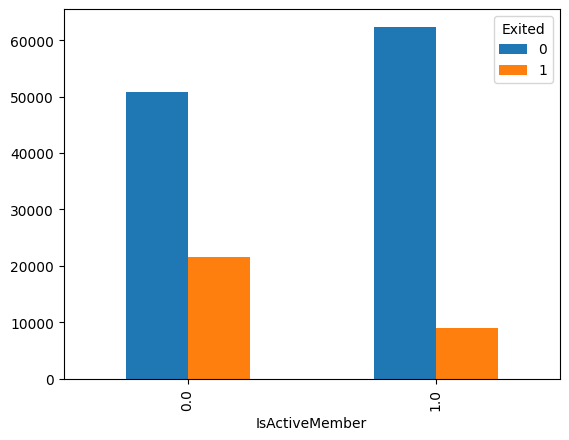

In [35]:
pd.crosstab(df['IsActiveMember'],df['Exited']).plot(kind="bar")
# les clients qui partent le plus sont ceux qui ne sont pas des membres actifs

# ANALYSE MULTIVARIEE ENTRE CONTINUE ET CONTINUE

In [36]:
df.groupby("Exited")["CreditScore"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,657.532136,79.899437,350.0,599.0,662.0,711.0,850.0
1,30450.0,652.249031,81.221163,350.0,593.0,651.0,709.0,850.0


<Axes: xlabel='Exited'>

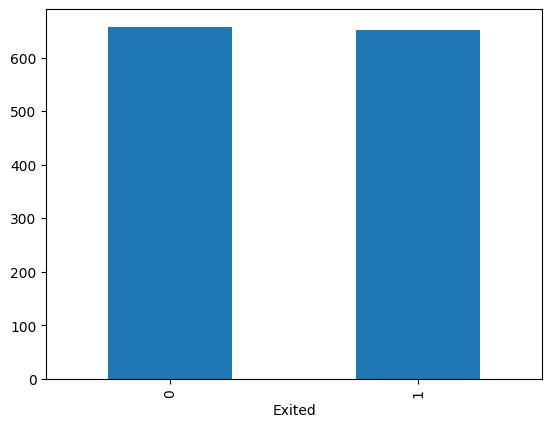

In [37]:
df.groupby("Exited")["CreditScore"].mean().plot(kind="bar")
# ceux qui parte dans notre jeu de donnees on un creditscore moyen inferieur a ceux qui restent 

In [38]:
df.groupby("Exited")["Age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,36.58,8.17,18.0,31.0,36.0,40.0,92.0
1,30450.0,43.94,8.98,18.0,38.0,44.0,50.0,92.0


<Axes: xlabel='Exited'>

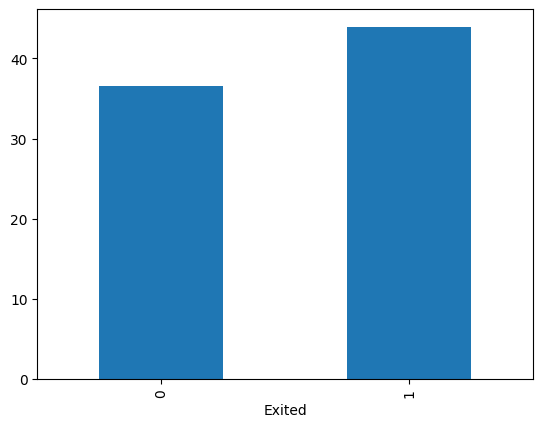

In [39]:
df.groupby("Exited")["Age"].mean().plot(kind="bar")
# ceux qui partent on un age moyen superieur a ceux qui restent donc 36.58 et ceux qui partent 43.94

In [40]:
df.groupby("Exited")["Balance"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,51274.230558,62196.885812,0.0,0.0,0.00,116811.12,250898.09
1,30450.0,71358.363247,62606.860862,0.0,0.0,98959.19,125521.18,238387.56


<Axes: xlabel='Exited'>

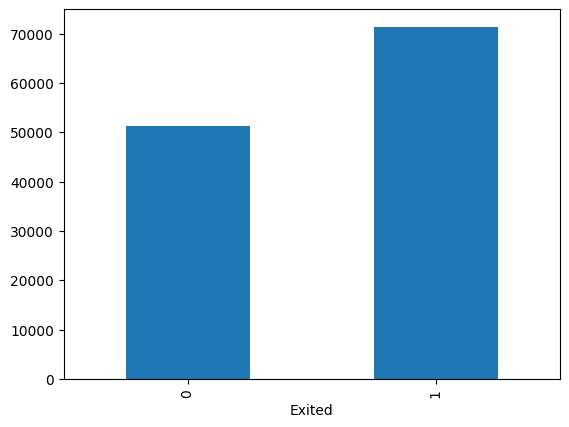

In [41]:
df.groupby("Exited")["Balance"].mean().plot(kind="bar")
# ceux qui partent on un solde moyen superieur a ceux qui restent dans notre jeu de donnees

# TEST DES HYPOTHESES ET VERIFICATIONS PAR DES CALCULS


<h1>questions regroupées</h1>
<h3>Les clients âgés partent-ils plus ?</h3>
<h3>Les hommes ou femmes partent-ils plus ?</h3>
<h3>Certains pays ont-ils plus de churn ?</h3>
<h3>Les clients avec peu d'argent partent-ils plus ?</h3>
<h3>Avoir plusieurs produits fidélise-t-il ?</h3>
<h3>Les membres inactifs partent-ils plus ?</h3>
<h3>Les nouveaux clients partent-ils plus vite ?</h3>
<h3>Un mauvais score pousse-t-il à partir ?</h3>
<h3>Avoir une carte bancaire fidélise-t-il ?</h3>
<h3>Les petits salaires partent-ils plus ?</h3>


In [42]:
#les clients ages partent-ils plus?


alpha = 0.02
groupe0 = df.query("Exited == 0")["Age"]  # Restés
groupe1 = df.query("Exited == 1")["Age"]  # partis

pvalue = ttest_ind(groupe1,groupe0,alternative="greater").pvalue

if pvalue < alpha:
    print("on a assez d'hypotese pour rejetter H0: les clients ages partent  plus ")
else:
    print("on a pas assez d'hyposethe h0:  pas de difference significative")

on a assez d'hypotese pour rejetter H0: les clients ages partent  plus 


In [43]:
# h3>Les hommes ou femmes partent-ils plus ?</h3>

crosstad = pd.crosstab(df["Gender"],df["Exited"])

alpha = 0.02

pvalue = chi2_contingency(crosstad).pvalue

if pvalue < alpha:
    print("on a assez dargument pour rejeter h0: les variables sont liees")
else:
    print("on a pas assez d'argument pour rejeter h0: les variables sont independantes")


on a assez dargument pour rejeter h0: les variables sont liees


In [44]:
# <h3>Certains pays ont-ils plus de churn ?</h3>

#variables categorielle(discrete)  vs discrete
alpha = 0.02
pvalue = chi2_contingency(pd.crosstab(df['Geography'],df["Exited"])).pvalue

if pvalue < alpha:
    print("on a assez d'argument pour rejetter h0 : les variables sont liees")
    print("cela veux dire il ya certains pays qui on plus de churn ")
else:
    print("on a pas assez d'argument pour rejeter  h0: les variables ont independantes")
    print("certains pays non pas plus de churn")


on a assez d'argument pour rejetter h0 : les variables sont liees
cela veux dire il ya certains pays qui on plus de churn 


In [45]:
#<h3>Les clients avec peu d'argent partent-ils plus ?</h3>
#variable continue vs discrete(categorielle)

alpha = 0.02

groupe_restes = df[df['Exited'] == 0]['Balance']
groupe_partis = df[df['Exited'] == 1]['Balance']


pvalue = ttest_ind(groupe_restes,groupe_partis).pvalue

if pvalue < alpha :
    print("on rejette h0: il ya une correlation entre solde (Balance ) et partir(Exited)")
else:
    print("on a pas assez d'argument pour rejeter h0: il ya pas de correlation entre solde(Balance) et Partir(Exited)")

on rejette h0: il ya une correlation entre solde (Balance ) et partir(Exited)


In [46]:
#<h3>Avoir plusieurs produits fidélise-t-il ?</h3>

#variable dicrete vs discrete

alpha = 0.02

pvalue = chi2_contingency(pd.crosstab(df["NumOfProducts"],df['Exited'])).pvalue

if pvalue < alpha :
    print("on a assez d'argument pour rejeter h0: la varibale NumOfProducts est liee a Exited c a d le nombre de produit influence le depart")
else:
    print("on a pas assez d'element pour rejeter h0: les deux variables sont independantes  cet a dire le nombre de produits ninfluence pas le depart ")

on a assez d'argument pour rejeter h0: la varibale NumOfProducts est liee a Exited c a d le nombre de produit influence le depart


In [47]:
#<h3>Les membres inactifs partent-ils plus ?</h3>

crosstad2 = pd.crosstab(df['IsActiveMember'],df['Exited'])


alpha=0.02
pvalue = chi2_contingency(crosstad2).pvalue

if pvalue < alpha:
    print(" on rejete h0 les vaibles sont liees")
else:
    print("on ne rejete pas h0: les deux variables sont independantes ")

 on rejete h0 les vaibles sont liees


In [48]:
#<h3>Les nouveaux clients partent-ils plus vite ?</h3>
alpha = 0.02

# TOUJOURS cette structure :
groupe0 = df[df["Exited"] == 0]["Tenure"]
groupe1 = df[df["Exited"] == 1]["Tenure"]
pvalue = ttest_ind(groupe1, groupe0).pvalue


if pvalue < alpha:
    print("on a assez d'argument pour rejeter h0 : les deux variables sont correlees")
else:
    print("on a pas assez dargument pour rejeter h0: les deux variables ne sont pas correlees")

on a assez d'argument pour rejeter h0 : les deux variables sont correlees


In [49]:
#<h3>Un mauvais score pousse-t-il à partir ?</h3>
groupe0 = df[df["Exited"] == 0]["CreditScore"]
groupe1 = df[df["Exited"] == 1]["CreditScore"]

alpha=0.02

pvalue = ttest_ind(groupe1, groupe0).pvalue


if pvalue < alpha:
    print("on a assez d'argument pour rejeter h0 : les deux variables sont correlees")
else:
    print("on a pas assez dargument pour rejeter h0: les deux variables ne sont pas correlees")

on a assez d'argument pour rejeter h0 : les deux variables sont correlees


In [50]:
#<h3>Avoir une carte bancaire fidélise-t-il ?</h3>

alpha  = 0.02

pvalue = chi2_contingency( pd.crosstab(df["HasCrCard"],df["Exited"])).pvalue

if pvalue < alpha:
    print(" on rejete h0 les vaibles sont liees")
else:
    print("on ne rejete pas h0: les deux variables sont independantes ")

 on rejete h0 les vaibles sont liees


In [51]:
#<h3>Les petits salaires partent-ils plus ?</h3>
groupe0 = df[df["Exited"] == 0]["EstimatedSalary"]
groupe1 = df[df["Exited"] == 1]["EstimatedSalary"]

alpha=0.02

pvalue = ttest_ind(groupe1, groupe0).pvalue


if pvalue < alpha:
    print("on a assez d'argument pour rejeter h0 : les deux variables sont correlees")
else:
    print("on a pas assez dargument pour rejeter h0: les deux variables ne sont pas correlees")

on a assez d'argument pour rejeter h0 : les deux variables sont correlees


In [52]:
df

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


In [53]:
df.drop(labels=["ID", "CustomerId", "Surname"], axis=1,inplace=True)


In [54]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...
143574,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


In [55]:
X =  df.drop(labels=['Exited'],axis=1)
y = df["Exited"]

In [56]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [57]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
57760,611,France,Male,39.0,8,0.00,2,1.0,0.0,1557.82
61750,659,France,Female,26.0,7,0.00,2,1.0,0.0,177622.31
100916,705,Germany,Female,45.0,6,90971.83,1,1.0,1.0,125302.64
100780,653,Spain,Male,32.0,4,0.00,2,1.0,1.0,57862.79
12355,590,France,Female,42.0,4,0.00,2,1.0,1.0,93820.49
...,...,...,...,...,...,...,...,...,...,...
60284,767,France,Male,30.0,3,89079.41,1,1.0,0.0,53179.21
75062,652,France,Female,32.0,3,143680.47,1,1.0,0.0,173989.47
130949,651,France,Male,27.0,2,0.00,1,1.0,1.0,132798.78
108075,622,France,Male,36.0,6,0.00,2,0.0,0.0,180696.54


In [58]:
Categorial_features =  X_train.select_dtypes(exclude=['int64', 'float64']).columns
numerical_features =  X_train.select_dtypes(include=['int64', 'float64']).columns


pipeline_1 = Pipeline(steps=[("encodage",OneHotEncoder(handle_unknown='ignore'))])

transformation = ColumnTransformer(transformers=[
    ("encodage",pipeline_1,Categorial_features),
    ("null","passthrough",numerical_features)
])

preprocessing = make_pipeline(transformation,PolynomialFeatures(degree=2,include_bias=False),
                              SelectKBest(score_func=f_classif,k=10),StandardScaler())
preprocessing

,steps,"[('columntransformer', ...), ('polynomialfeatures', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encodage', ...), ('null', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:


preprocessing_final=Pipeline(steps=[
    ("preprocessing",preprocessing),
    ("classifier",XGBClassifier(
        tree_method='hist',      
        device='cuda', 
        random_state=42,
        eval_metric='auc',
        enable_categorical=False
    ))
])

params = {
    
    'preprocessing__polynomialfeatures__degree': [1, 2],  
    'preprocessing__selectkbest__k': [20, 30, 40],  
    

    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1],
}

grid_search = GridSearchCV(
    estimator=preprocessing_final,
    param_grid=params,
    cv=5,
    scoring='roc_auc',
    n_jobs=1,      
    verbose=2      
)


In [62]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/xgboost/core.py:774: UserWarning: [00:58:58] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warning

[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=  -1.7s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=  -2.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=  -1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=  -1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=  -2.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=  -0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   2.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   2.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=  -2.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=  -1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=  -1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=  -1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   0.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.2s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=  -1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.1s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=20; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=30 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=30; total time=   1.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.5s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=40 is greater than n_features=13. All the features will be returned.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=1, preprocessing__selectkbest__k=40; total time=   1.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=  -1.3s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   2.4s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=20; total time=   1.6s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.7s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.8s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=30; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   2.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   2.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   2.0s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [14 15 27 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, preprocessing__polynomialfeatures__degree=2, preprocessing__selectkbest__k=40; total time=   1.9s


/home/romaric420/Bank_Churn/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:782: UserWarning: k=20 is greater than n_features=13. All the features will be returned.
  warnings.warn(


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'classifier__learning_rate': [0.05, 0.1], 'classifier__max_depth': [3, 5, ...], 'classifier__n_estimators': [100, 200], 'preprocessing__polynomialfeatures__degree': [1, 2], ...}"
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,steps,"[('columntransformer', ...), ('polynomialfeatures', ...), ...]"


In [64]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(best_params)


{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'preprocessing__polynomialfeatures__degree': 1, 'preprocessing__selectkbest__k': 20}


In [65]:
print(best_score)

0.8892612263421629


In [66]:
print(best_model)


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('encodage',
                                                                   Pipeline(steps=[('encodage',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index(['Geography', 'Gender'], dtype='object')),
                                                                  ('null',
                                                                   'passthrough',
                                                                   Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Estima...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                   

In [68]:
Y_pred=best_model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(28716,))

In [70]:
score = f1_score(y_test,Y_pred)
score

0.6298775822494261

In [72]:
df2 = pd.read_csv("test_data.csv")
df2

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,67897,15585246,Bancks,585,France,Female,53.0,2,0.00,2,1.0,1.0,91830.75
1,163075,15604551,Robb,606,France,Male,24.0,2,0.00,1,0.0,1.0,90876.95
2,134760,15729040,Ugochukwu,633,Germany,Male,44.0,1,118907.60,1,1.0,0.0,47777.15
3,68707,15792329,Hs?,602,Germany,Male,40.0,2,149961.99,2,1.0,1.0,82696.84
4,3428,15617166,Genovesi,645,France,Male,31.0,4,132351.29,1,1.0,0.0,151887.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21450,24790,15697574,Lucchese,685,France,Male,35.0,4,0.00,2,1.0,1.0,175072.47
21451,152608,15682708,Tuan,648,Spain,Female,47.0,3,0.00,1,1.0,0.0,156680.71
21452,28134,15614215,Ebelegbulam,607,France,Female,32.0,3,0.00,2,1.0,1.0,173599.38
21453,123871,15587573,Manna,705,France,Female,56.0,0,0.00,1,1.0,0.0,161479.19


In [73]:
predictions = best_model.predict(df2)

In [74]:
predictions

array([0, 0, 1, ..., 0, 1, 0], shape=(21455,))

In [76]:
results = pd.DataFrame({
    "ID": df2["ID"],
    "Exited": predictions
})

results.set_index("ID", inplace=True)

In [77]:
results.to_csv("preditions.csv")